In [1]:
import pandas as pd

# Load the cleaned CSV file
file_path = "drivebc_2020_2024_cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows
df.head()

,Unnamed: 0,ID,STATUS,HEADLINE,EVENT_TYPE,EVENT_SUBTYPE,SEVERITY,CREATED,UPDATED,TIME_ZONE,...,ROAD_FROM_DESCRIPTION,ROAD_TO_DESCRIPTION,ROAD_DIRECTION,ROAD_STATE,ROAD_DELAY,YEAR,IVR_MESSAGE,MONTH,DAY,WEEKDAY
0,1.0,drivebc.ca/DBCRCON-67369,ACTIVE,Slippery sections,ROAD_CONDITION,PARTLY_ICY,MINOR,2020-04-01 04:40:00,2020-04-01 04:40:00,America/Vancouver,...,Gilbert No 1 Rd,Bill Rd,NONE,NaN,NaN,2020,NaN,4,1,Wednesday
1,2.0,drivebc.ca/DBCRCON-67368,ACTIVE,Slippery sections,ROAD_CONDITION,PARTLY_ICY,MINOR,2020-04-01 04:40:00,2020-04-01 04:40:00,America/Vancouver,...,Ross Rd,Olson Rd,NONE,NaN,NaN,2020,NaN,4,1,Wednesday
2,3.0,drivebc.ca/DBCRCON-67367,ACTIVE,Slippery sections,ROAD_CONDITION,PARTLY_ICY,MINOR,2020-04-01 04:40:00,2020-04-01 04:40:00,America/Vancouver,...,the start of Highway 26,Norton Creek Rd,NONE,NaN,NaN,2020,NaN,4,1,Wednesday
3,4.0,drivebc.ca/DBCRCON-67374,ACTIVE,Slippery sections,ROAD_CONDITION,PARTLY_ICY,MINOR,2020-03-31 16:07:00,2020-04-01 04:52:00,America/Vancouver,...,Edric Rd,Kloss Rd,NONE,NaN,NaN,2020,NaN,3,31,Tuesday
4,5.0,drivebc.ca/DBCRCON-67373,ACTIVE,Slippery sections,ROAD_CONDITION,PARTLY_ICY,MINOR,2020-04-01 04:51:00,2020-04-01 04:53:00,America/Vancouver,...,Ferry Ave,Loos Rd,NONE,NaN,NaN,2020,NaN,4,1,Wednesday


In [2]:
# Group by severity and year, and count events
grouped_by_severity = df.groupby(['SEVERITY', 'YEAR']).size().reset_index(name='event_count')
grouped_by_severity = grouped_by_severity.sort_values('event_count', ascending=False)


# View the first few rows
grouped_by_severity.head(10)

,SEVERITY,YEAR,event_count
5,MINOR,2020,158620
6,MINOR,2021,156118
7,MINOR,2022,154992
9,MINOR,2024,150868
8,MINOR,2023,141034
1,MAJOR,2021,15306
4,MAJOR,2024,14738
2,MAJOR,2022,14437
3,MAJOR,2023,13117
0,MAJOR,2020,11382


In [3]:
# Pivot the table for plotting
pivot_severity = grouped_by_severity.pivot(index='YEAR', columns='SEVERITY', values='event_count').fillna(0)

# Display the reshaped table
pivot_severity

SEVERITY,MAJOR,MINOR
YEAR,,
2020,11382,158620
2021,15306,156118
2022,14437,154992
2023,13117,141034
2024,14738,150868


In [4]:
# Group by AREA_NAME and count
grouped_area = df.groupby('AREA_NAME').size().reset_index(name='event_count')

# Sort in descending order
top_areas = grouped_area.sort_values(by='event_count', ascending=False).head(10)

# View top 10
top_areas

,AREA_NAME,event_count
1,Cariboo District,124040
4,Okanagan-Shuswap District,106061
6,Rocky Mountain District,101992
3,Lower Mainland District,88664
5,Peace District,88500
10,West Kootenay District,87578
0,Bulkley Stikine District,62355
8,Thompson-Nicola District,60044
9,Vancouver Island District,46383
2,Fort George District,39923


In [5]:
import os
os.makedirs("data", exist_ok=True)

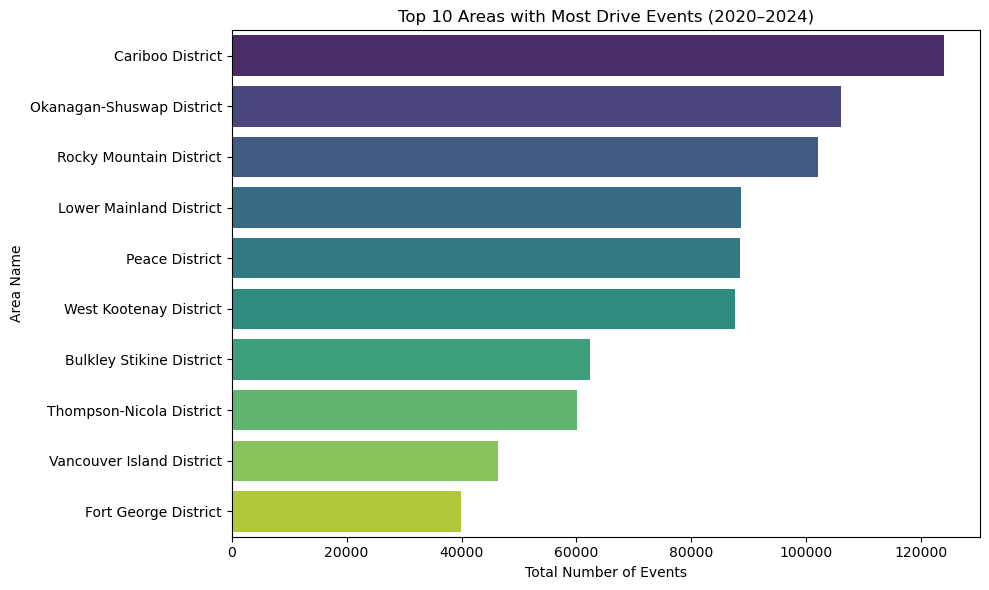

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure folder exists before saving
os.makedirs("data", exist_ok=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_areas, x='event_count', y='AREA_NAME', palette='viridis')
plt.title("Top 10 Areas with Most Drive Events (2020–2024)")
plt.xlabel("Total Number of Events")
plt.ylabel("Area Name")
plt.tight_layout()
plt.savefig("data/plot_top10_areas.png")
plt.show()

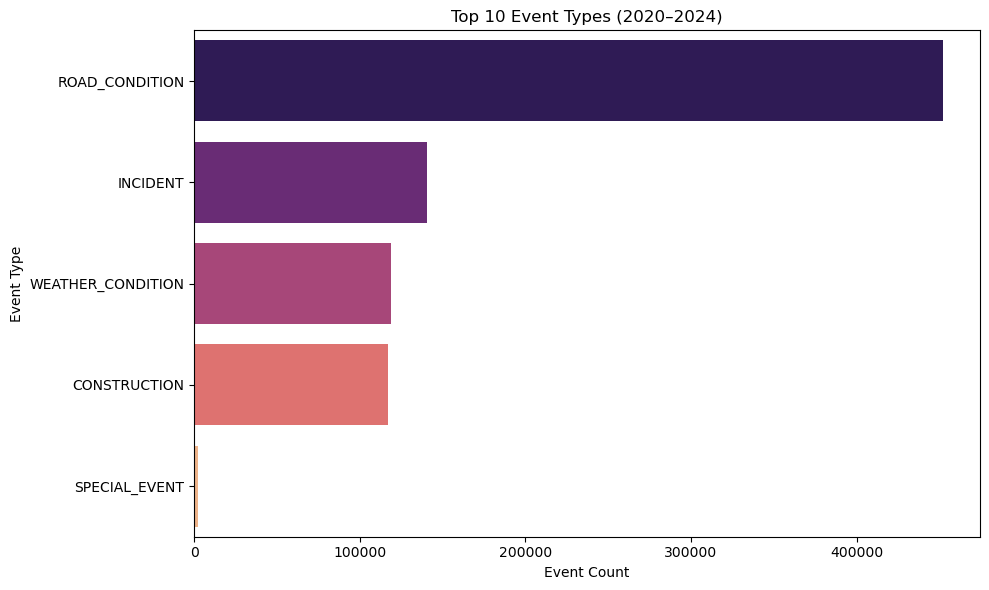

In [8]:
# Group and sort
grouped_type = df.groupby('EVENT_TYPE').size().reset_index(name='event_count')
top_types = grouped_type.sort_values(by='event_count', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_types, x='event_count', y='EVENT_TYPE', palette='magma')
plt.title("Top 10 Event Types (2020–2024)")
plt.xlabel("Event Count")
plt.ylabel("Event Type")
plt.tight_layout()
plt.savefig("data/plot_top10_event_types.png")
plt.show()